# Sampling in Python

<br>

<br>

---

### Dataset

In [2]:
import pandas as pd
import numpy as np

In [3]:
file = 'spotify_2000_2020.feather'
df = pd.read_feather(file)

print(df.shape)
df.head()

(41656, 20)


,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
0,0.97200,['David Bauer'],0.567,313293.0,5.221550,0.227,0.0,0w0D8H1ubRerCXHWYJkinO,0.601000,10.0,0.110,-13.441,1.0,Shout to the Lord,47.0,2000,0.0290,136.123,0.0396,2000.0
1,0.32100,['Etta James'],0.821,360240.0,6.004000,0.418,0.0,4JVeqfE2tpi7Pv63LJZtPh,0.000372,9.0,0.222,-9.841,0.0,Miss You,51.0,2000-12-12,0.0407,117.382,0.8030,2000.0
2,0.00659,['Quasimoto'],0.706,202507.0,3.375117,0.602,1.0,5pxtdhLAi0RTh1gNqhGMNA,0.000138,11.0,0.400,-8.306,0.0,Real Eyes,44.0,2000-06-13,0.3420,89.692,0.4790,2000.0
3,0.00390,['Millencolin'],0.368,173360.0,2.889333,0.977,0.0,3jRsoe4Vkxa4BMYqGHX8L0,0.000000,11.0,0.350,-2.757,0.0,Penguins & Polarbears,52.0,2000-02-22,0.1270,165.889,0.5480,2000.0
4,0.12200,['Steve Chou'],0.501,344200.0,5.736667,0.511,0.0,4mronxcllhfyhBRqyZi8kU,0.000000,7.0,0.279,-9.836,0.0,黃昏,53.0,2000-12-25,0.0291,78.045,0.1130,2000.0


<br>

<br>

---

### Simple Sample

* <b><code>.sample(n)</code> - </b> Sample using pandas sample function

In [4]:
df_samp = df.sample(n=1000, random_state=1001)
df_samp.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
36921,0.14700,['Glass Animals'],0.676,288733.0,4.812217,0.645,0.0,7jO2B8Xgfu7D9vj60XiG7Y,0.000173,0.0,0.1250,-8.647,1.0,Pools,56.0,2014-06-03,0.0393,105.072,0.226,2014.0
21054,0.00318,['P.O.D.'],0.559,190760.0,3.179333,0.931,0.0,5DooySfCD1xCJ49gQm9rx7,0.000012,9.0,0.0624,-5.863,1.0,Boom,65.0,2001-09-11,0.0721,90.911,0.644,2001.0
13480,0.83400,['Jamie Cullum'],0.621,307960.0,5.132667,0.310,0.0,3xPpJIXIj3VuMSOJzAaeUY,0.000061,5.0,0.1020,-11.109,1.0,What A Difference A Day Made,43.0,2009-01-01,0.0276,96.497,0.387,2009.0
31248,0.26300,['Justin Bieber'],0.648,200773.0,3.346217,0.681,0.0,2o9LAypwGH4ctV0i9boo6d,0.007830,2.0,0.0971,-8.389,0.0,Come Around Me,76.0,2020-02-14,0.0378,157.941,0.767,2020.0
25714,0.03660,"['Ciara', 'Chamillionaire']",0.941,263373.0,4.389550,0.631,0.0,4PrquuUN34hswtM71OMvxS,0.000002,1.0,0.0311,-5.998,0.0,Get Up (feat. Chamillionaire),63.0,2006-08-08,0.1140,128.597,0.630,2006.0


<br>

<br>

---

### Systematic Sample

* **Systematic -** Sample every $n^{th}$ row
* **Sample size -** Define sample size
* **Population Size -** Compute the pop size of dataset (i.e. df length)
* **Interval -** Compute sampling interval

$
  Systematic Sample Interval = \frac{Population Size}{Sample Size}\
$

* **Shuffle -** Good practice to *shuffle* the dataset to eradicate any chronological bias

In [21]:
# shuffle
df_shuffled = df.sample(frac=1)

# interval calc
sample_size = 100
pop_size = len(df_shuffled.index)
interval = pop_size // sample_size

# sampling
df_sys = df_shuffled[::interval]
df_sys.head()

,acousticness,artists,danceability,duration_ms,duration_minutes,energy,explicit,id,instrumentalness,key,liveness,loudness,mode,name,popularity,release_date,speechiness,tempo,valence,year
21496,0.1300,['Josh Turner'],0.605,228187.0,3.803117,0.864,0.0,1KhrAWvLIjRlQIJtSTgvsi,0.000827,6.0,0.1130,-5.365,1.0,Would You Go With Me,66.0,2006,0.0292,122.918,0.736,2006.0
267,0.0367,['Brian McKnight'],0.741,248240.0,4.137333,0.437,0.0,4geR2biU0ogmJgtIhzqUA8,0.001840,3.0,0.0496,-8.190,0.0,Anytime,40.0,2002-11-05,0.0314,129.896,0.533,2002.0
19016,0.9530,['Pete Seeger'],0.530,77520.0,1.292000,0.397,0.0,3nj18sxe1CA0eohDsDirrm,0.004930,4.0,0.3100,-10.352,1.0,"Oh, Susanna",41.0,2002-06-25,0.0603,137.893,0.795,2002.0
31465,0.0211,['Queens of the Stone Age'],0.448,198387.0,3.306450,0.966,0.0,5yprGKAwV1GSJSiATa50Ni,0.059500,6.0,0.1350,-4.029,1.0,First It Giveth,47.0,2002,0.1010,107.293,0.380,2002.0
34453,0.0441,"['Blake Shelton', 'Trace Adkins']",0.611,225280.0,3.754667,0.964,0.0,7dL2kSVsBelmkQHbkNkx1l,0.000074,7.0,0.1090,-3.076,1.0,Hillbilly Bone (feat. Trace Adkins),52.0,2010-03-01,0.0464,144.014,0.900,2010.0


<br>

<br>

---

### Population Parameter vs Point Estimate

* <b>Population Parameter - </b>Calculation made on whole dataset
* <b>Point Estimate - </b>Calculation based on sample dataset
* The mean song duration <code>duration_minutes</code> in the sample is <b>similar, but not identical</b> to the mean song duration in the whole population.

In [12]:
duration = 'duration_minutes'

population_parameter = np.mean(df[duration])
point_estimate = np.mean(df_samp[duration])

print('Population Parameter = ' + str(population_parameter))
print('Point Estimate = ' + str(point_estimate))

Population Parameter = 3.8521519140900073
Point Estimate = 3.90404755


<br>

<br>

---

### Histograms & Distrubtions

* <b>Histogram - </b>Shows distribution of data
* <b>Generalizabile Results - </b>Properly sampled data can produce generalizable results where the point estimates & distributions are closely aligned to the population

In [13]:
import matplotlib.pyplot as plt 

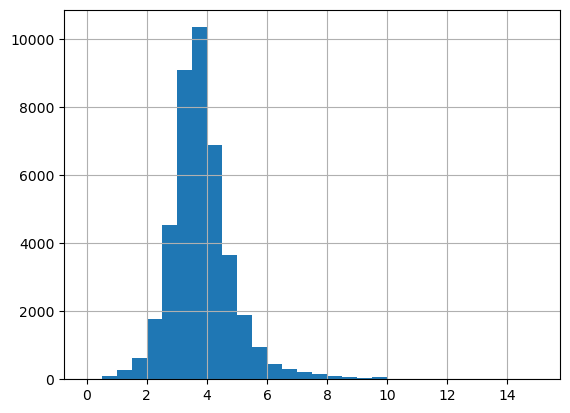

In [14]:
df[duration].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

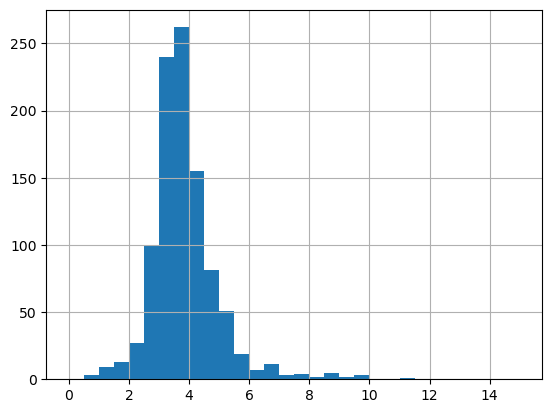

In [15]:
df_samp[duration].hist(bins=np.arange(0, 15.5, 0.5))
plt.show()

<br>

<br>

---

### Random Number Generation

* <b>Types - </b>Different distributions available (Normal, Uniform, etc)
* <b>Random - </b>Prepend any sampling/randomness with <code>.random</code>
* <b>Seeds - </b>Use <code>np.random.seed()</code> to seed samples to maintain reproducable results

[ 1.50697415  2.66514282  2.89003179 ...  1.14736368  5.8464008
 -7.40172817]


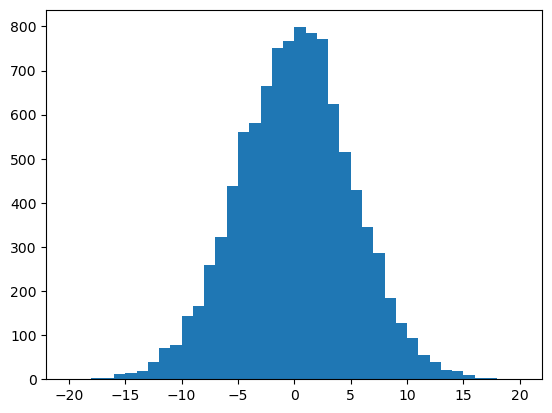

In [16]:
#np.random.seed(1001)
normals = np.random.normal(loc=0, scale=5, size=10000)

plt.hist(normals, bins=np.arange(-20, 21, 1))

print(normals)
plt.show()

[-1.9376782  -2.34936434 -3.03939937 ... -1.04180829  0.71456544
 -4.6015477 ]


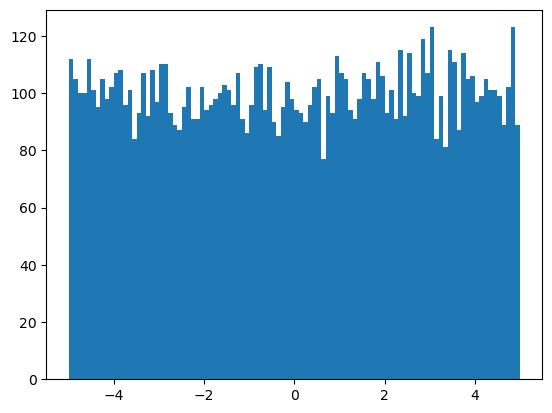

In [17]:
np.random.seed(1001)
uniforms = np.random.uniform(low=-5, high=5, size=10000)

plt.hist(uniforms, bins=np.arange(-5, 5.1, 0.1))

print(uniforms)
plt.show()